For the second assignment, I would like you to identify a data set for network analysis. This may be a directional or non-directional plot depending on your purpose. You will want to provide a title, clear indication of the data source, and brief description. How many nodes? How many edges? What do the edges represent? Why did you choose the graph representation that you chose? You are welcome to use any library that you prefer- networkx, plotly, plotly express, bokeh, seaborn.... whatever gets the job done. Then go back and indicate what you feel is missing- what would you have changed? Would hover points have been useful? Do you like your color scheme, what about the labeling? Be as critical as you can be.

In [132]:
import pandas as pd
import networkx as nx
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In this assignment, I chose to analyze the network relationships between characters in the Japanese anime Cowboy Bebop (1998). This is my all-time favourite anime and I want to understand the character constructions of this anime within 24 episodes. In addition, through network analysis, I want to know how gendered characters are constructed and how female characters' social relations in this anime different from male characters. I created the data myself based on the characters list on wikipedia and fandom.com. I listed all the relationships on Numbers (spreadsheet software on Mac) and converted into a CSV file as the data for this jupyter notebook. I did not list every single relation between characters in every single episode, as it's too much of work and can't be accomplished within such short time. Therefore I only listed the major relationships between the five main characters 

(from left to right: 
Ein: the corgi dog; Edward: the little girl; Spike: the young men; Jet: the middle-aged man; Faye: the young woman), 

as well as their relationships with other characters that push the story or hold special meanings. Besides, after the original series in 1998, Cowboy Bebop later made a movie version and a Netflix live-action version with addition of new characters. In this assignment, I will only analyze the characters' relationship from the original series in 1998, as later characters are crafted by other screenwriters/production teams therefore the logic will not be coherent with the original. 

#https://en.wikipedia.org/wiki/List_of_Cowboy_Bebop_characters
#https://cowboybebop.fandom.com/wiki/Character_List

The codes in this assignment are either from the codes in Week 3's jupyernotebook "Social Network Analysis with Networkx in Python -Working With Datasets" or inquires online with source cited. 

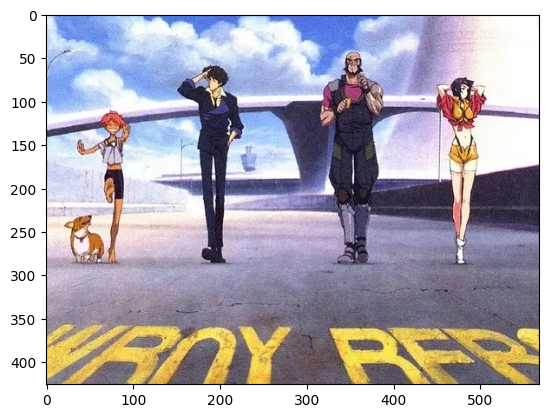

In [134]:
plt.imshow(mpimg.imread('32b4ad_dd2b075b11254b18ad0eee158e42aab1~mv2.webp'))
#https://stackoverflow.com/questions/35286540/how-to-display-an-image

In [76]:
cbp = pd.read_csv("Cowboy Bebop Network Data.csv")

In [77]:
cbp.head()

,Character 1,Character 2,Relationship Description,Category
0,Ein,Abdul Hakim,Abdul attempted to steal Ein,Enemy
1,Jet Black,Alisa,Ex-girlfriend,Complex
2,Rhint,Alisa,Current lovers,Complex
3,Spike Spiegel,Andy von de Oniyate,"Share lots similarities, both egoistic cowboys",Neutral
4,Gren,Annie,"Friends, Annie shelters Gren for a time",Ally


In [78]:
graph = nx.from_pandas_edgelist(cbp,source="Character 1",target="Character 2",edge_attr=["Category"])

In [79]:
#How many nodes? How many edges?
print(f"in Cowboy Bebop, the characters have a {graph}")

in Cowboy Bebop, the characters have a Graph with 32 nodes and 51 edges


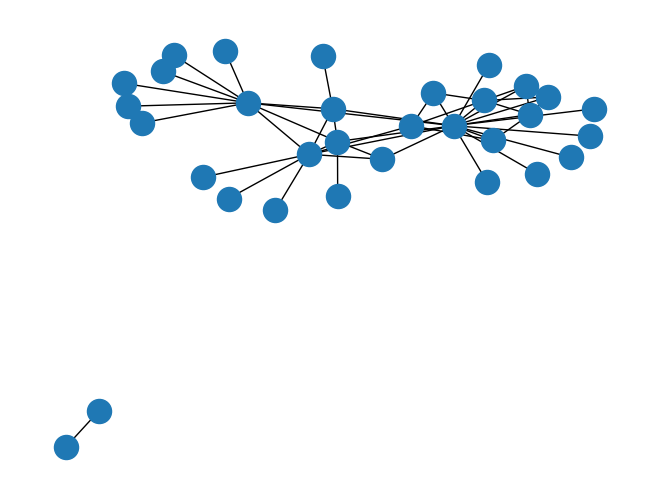

In [80]:
nx.draw(graph)

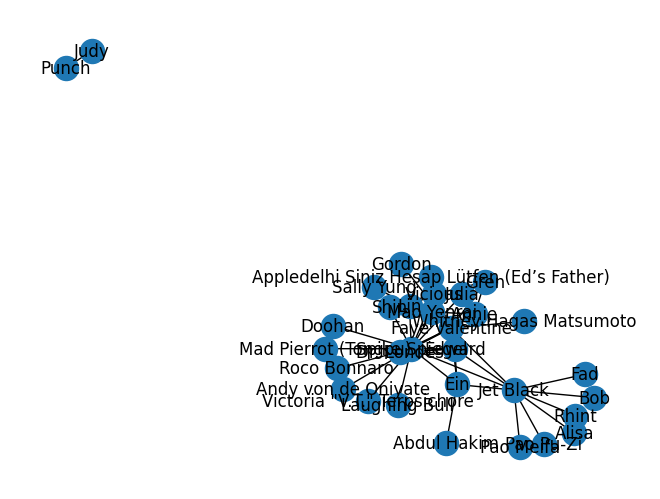

In [84]:
nx.draw(graph,with_labels=True)

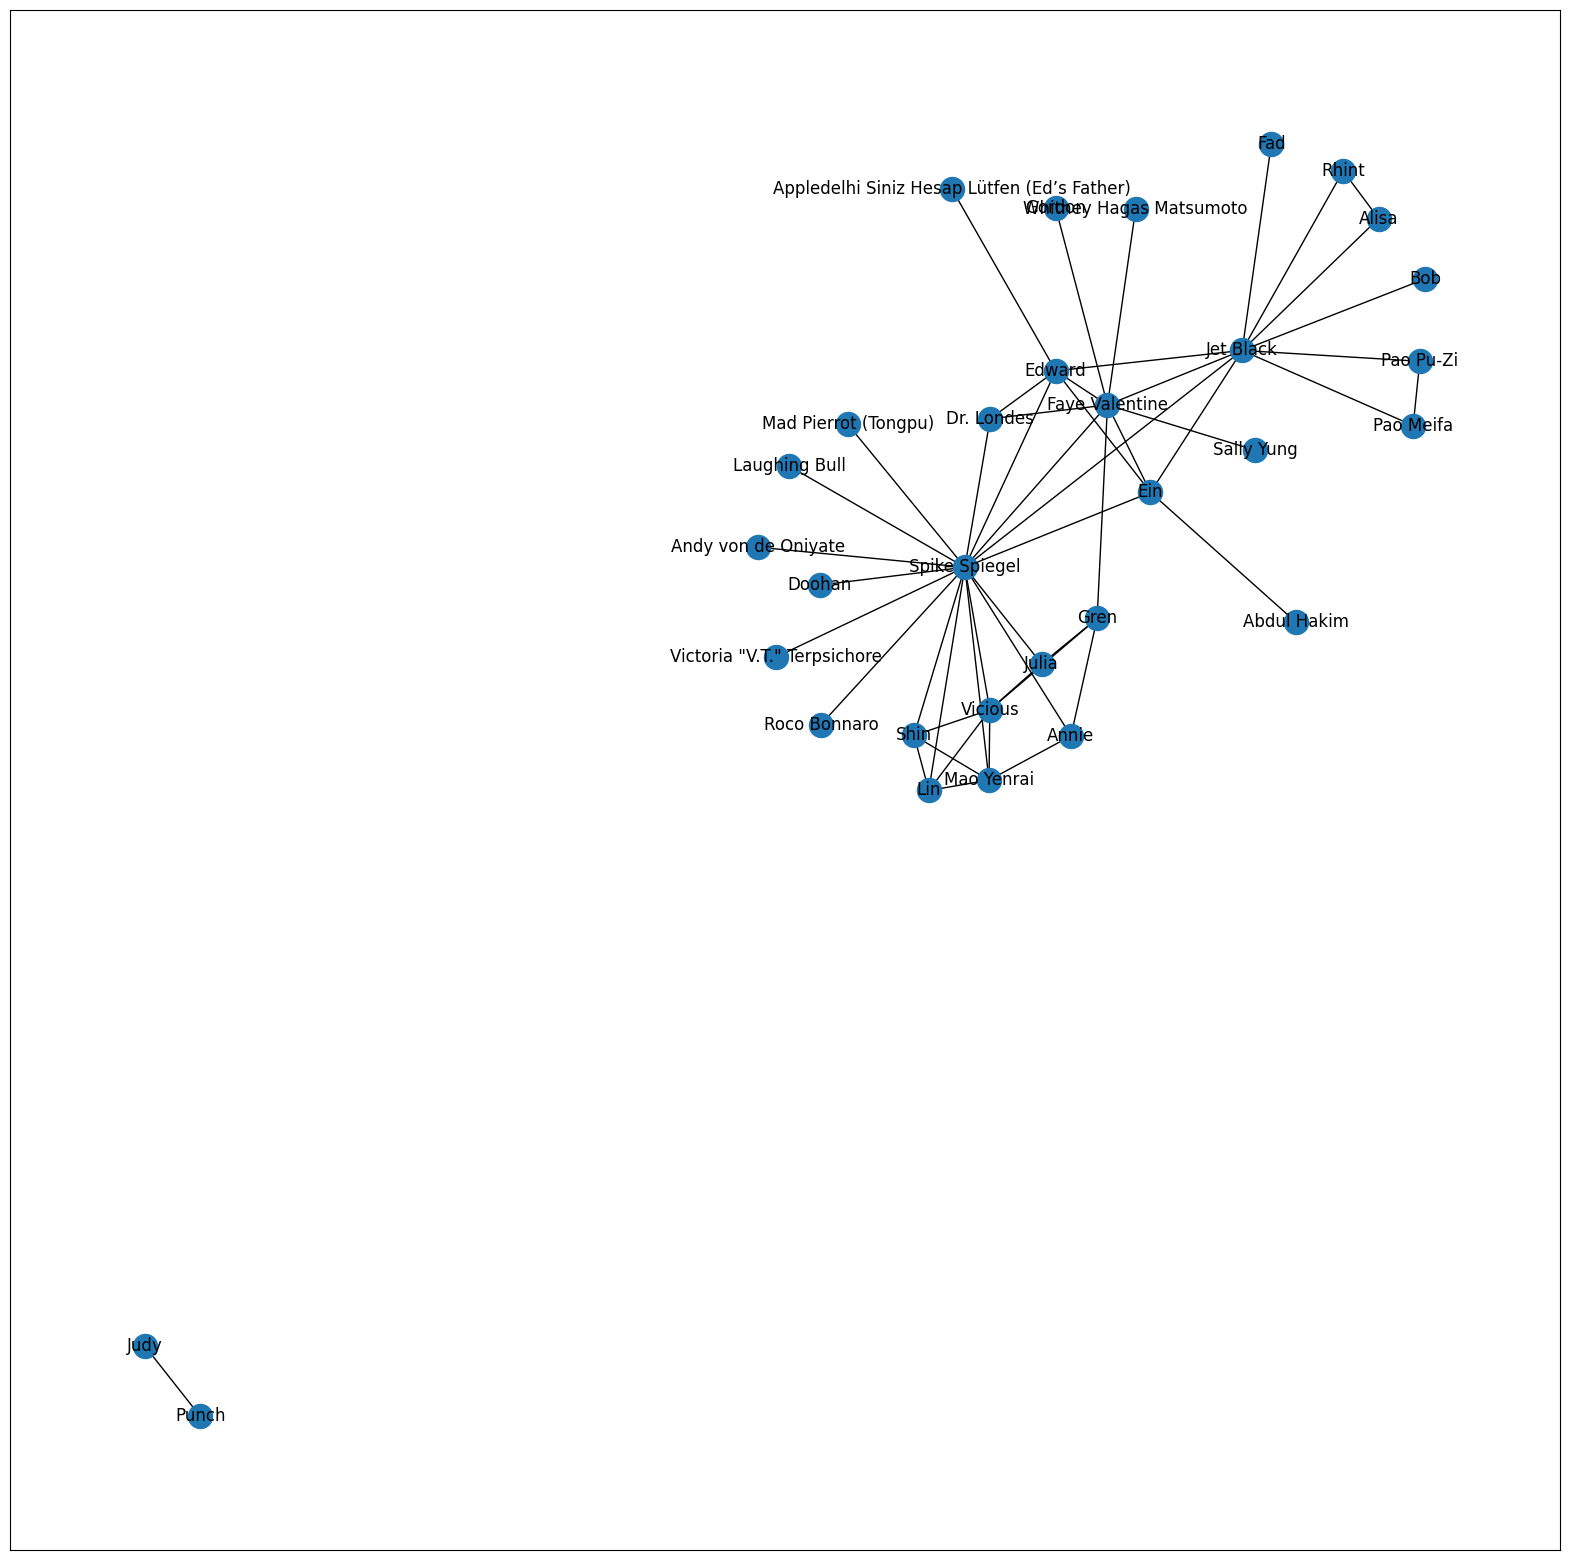

In [135]:
plt.figure(figsize=(20,20))
nx.draw_networkx(graph)
plt.show()
#apparently Spike is the no-doubt "main" character of this anime 

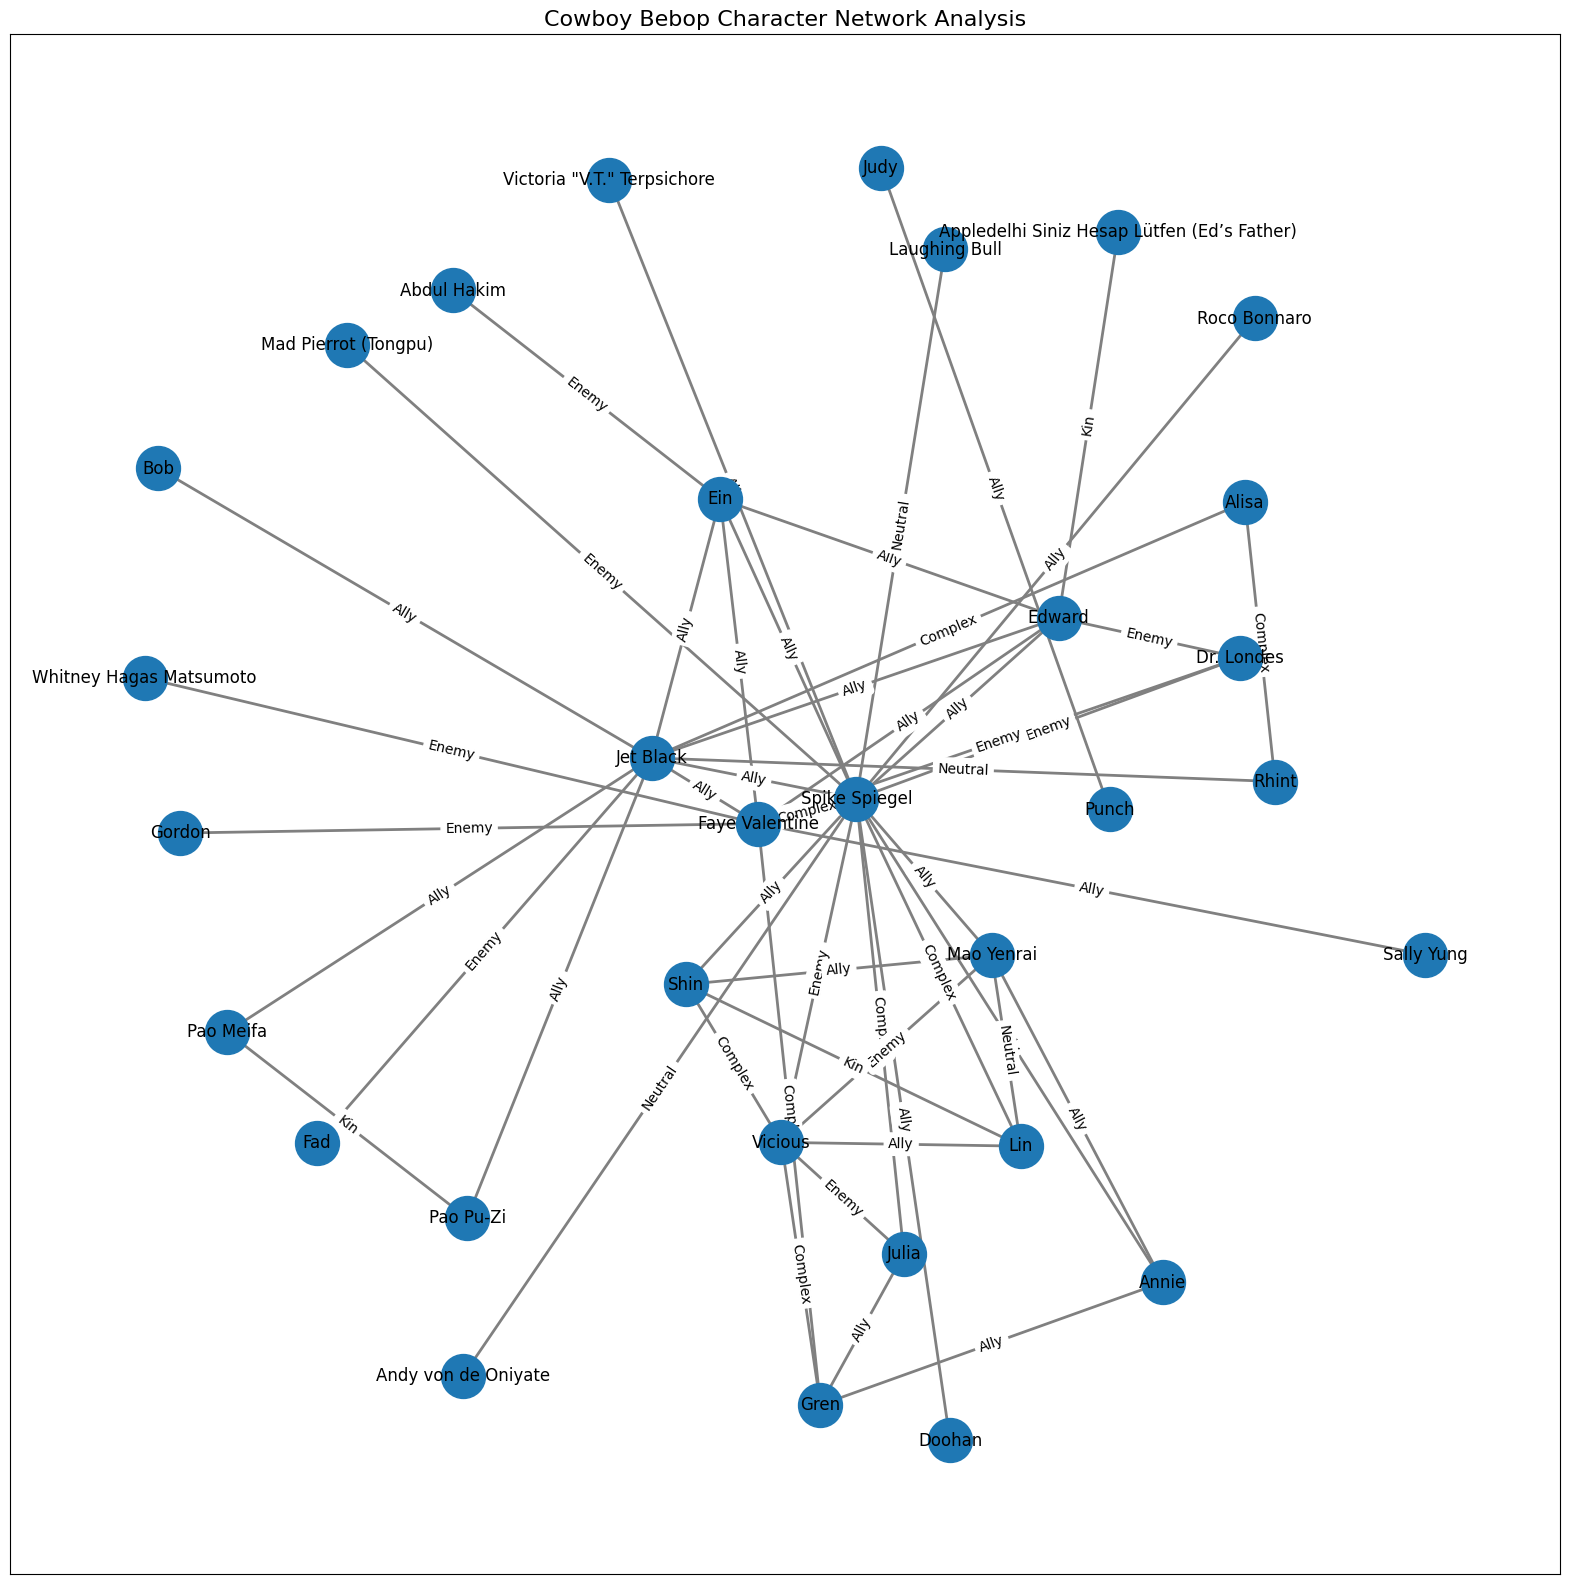

In [123]:
#google: how to spread edges in networkx python
spread = nx.spring_layout(graph, k=1)

plt.figure(figsize=(20, 20))

nx.draw_networkx_nodes(graph, spread, node_size=1000)
nx.draw_networkx_edges(graph, spread, edge_color="gray", width=2)
nx.draw_networkx_labels(graph, spread, font_size=12)
#https://stackoverflow.com/questions/47094949/labeling-edges-in-networkx
edge_labels = {(character1, character2): cbp["Category"] for character1, character2, cbp in graph.edges(data=True)} #as dictionary, get the value/category
nx.draw_networkx_edge_labels(graph, spread, edge_labels, font_size=10)

plt.title("Cowboy Bebop Character Network Analysis", fontsize=16)
plt.show()

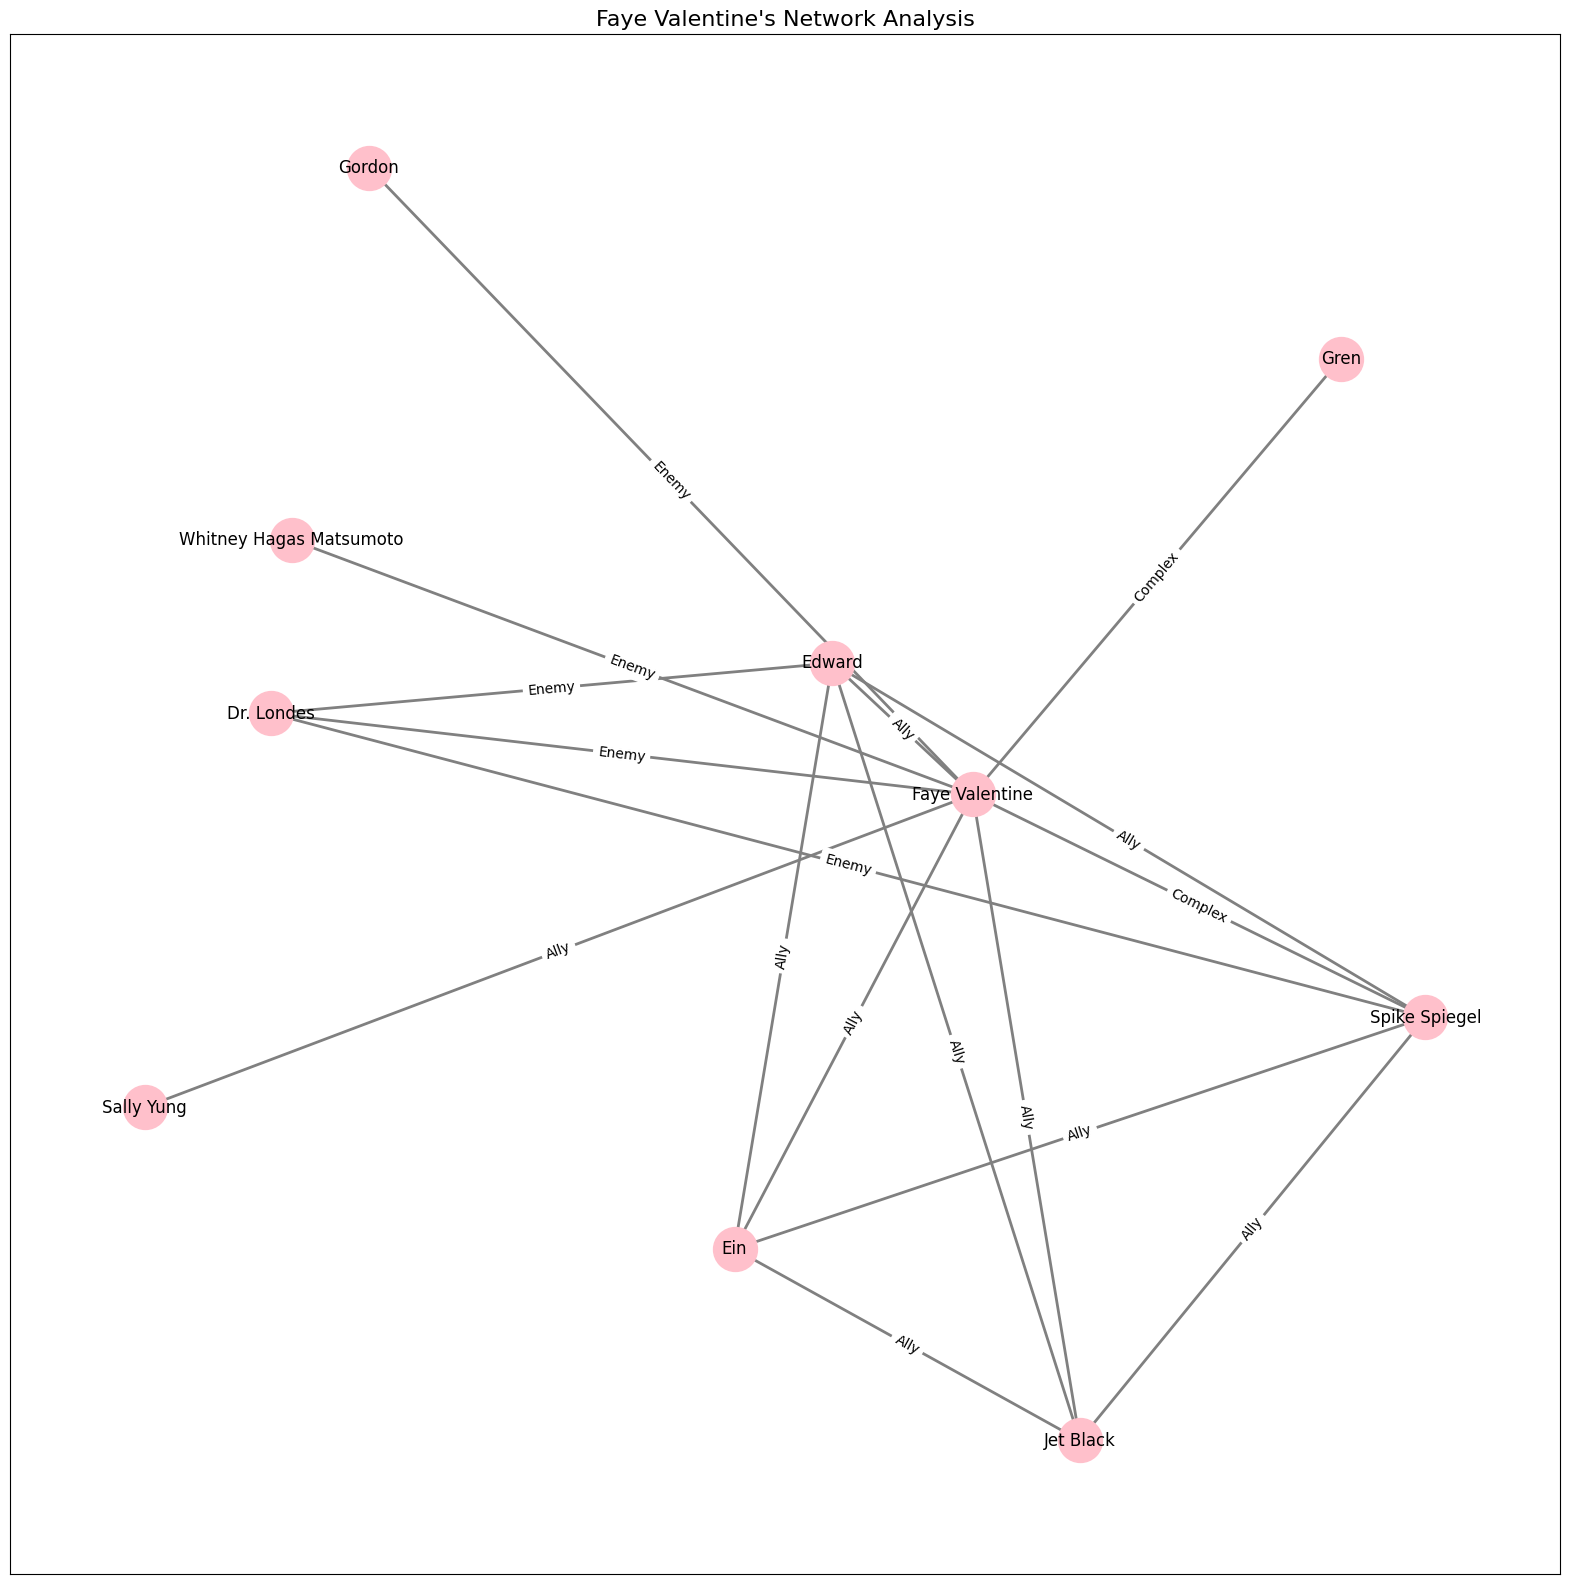

In [122]:
spread = nx.spring_layout(graph, k=1.2)

plt.figure(figsize=(20, 20))

faye_graph = nx.ego_graph(graph, "Faye Valentine") #to get Faye's edges
#https://networkx.org/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html
nx.draw_networkx_nodes(faye_graph, spread, node_color="pink", node_size=1000)
nx.draw_networkx_edges(faye_graph, spread, edge_color="gray", width=2)
nx.draw_networkx_labels(faye_graph, spread, font_size=12)

edge_labels = {(character1, character2): cbp["Category"] for character1, character2, cbp in faye_graph.edges(data=True)} 
nx.draw_networkx_edge_labels(faye_graph, spread, edge_labels, font_size=10)

plt.title("Faye Valentine's Network Analysis", fontsize=16)
plt.show()

At the end of the anime, Faye states that she feels lonely and could not find a sense of belonging in the universe (as they all live in outerspace). After being dormanted for 77 years, she lost most of her friends and families except for Sally, who now is a old lady with not much time left. Through this network graph, we can also see that most of her relations are from this little group of five (Ein, Edward, Spike, and Jet), and she only holds three independent relations that's outside of the group, and only one of them is labeled as "Ally." Gren, the person who has an ambiguous romance with her, died in episode 13. When I was watching it earlier, I didn't really understand what Faye mean by "loneliness," but through this graph, it's true that she doesn't have much social bondings. This further leads to the question, why Faye can't be as Spike or Jet to attain more social networks and no longer feel lonely?

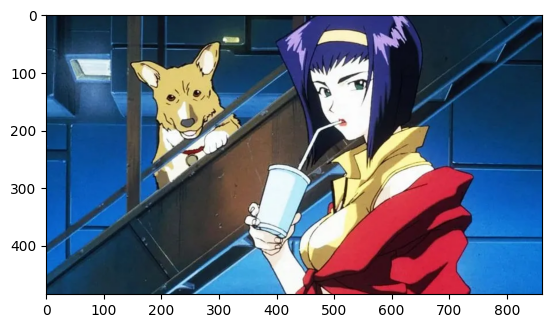

In [139]:
plt.imshow(mpimg.imread('faye-valentine_862x485.webp'))

In [126]:
most_influential = nx.degree_centrality(graph)
for w in sorted(most_influential, key=most_influential.get, reverse=True)[:10]:
    print(w, f"{most_influential[w]:.2f}")

Spike Spiegel 0.55
Jet Black 0.32
Faye Valentine 0.29
Edward 0.19
Vicious 0.19
Ein 0.16
Mao Yenrai 0.16
Gren 0.13
Lin 0.13
Shin 0.13


In [128]:
best_connector = nx.betweenness_centrality(graph)
for w in sorted(best_connector, key=best_connector.get, reverse=True)[:10]:
    print(w, f"{best_connector[w]:.2f}")

Spike Spiegel 0.54
Jet Black 0.32
Faye Valentine 0.21
Edward 0.07
Ein 0.06
Gren 0.01
Vicious 0.01
Annie 0.00
Julia 0.00
Mao Yenrai 0.00
